Predict stock market price for TESLA.

Imports

In [2]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

Read previous 'TSLA' data from Yahoo 

In [3]:
#using yfinance to download latest data from Yahoo.com
df = yf.download('TSLA', start='2020-01-01', end='2023-12-01')

[*********************100%%**********************]  1 of 1 completed


Extract the 'close' column

In [4]:
data = df['Close']

Fit the data into a machine learning model ARIMA

In [5]:
model = ARIMA(data, order=(5, 1, 0))
model_fit = model.fit()

c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Prediction for next 30 days

In [6]:
predictions = model_fit.forecast(steps=30)

c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Calculate MAE and prediction score

In [7]:
actual_prices = data[-30:].values  # Actual prices for the last 30 days
mae = mean_absolute_error(actual_prices, predictions)

#percentage score
prediction_percentage_score = 100 - (mae / actual_prices.mean() * 100)


Create a range for predection values

In [8]:
last_date = df.index[-1]
predictions_index = pd.date_range(start=last_date, periods=31)  # 31 days including the last day

Plot

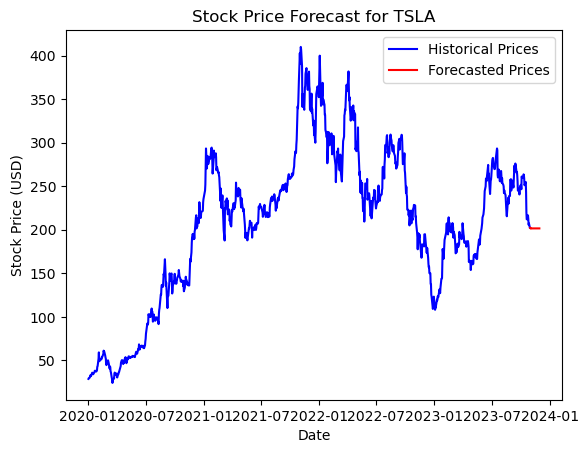

Forecasted Prices for the Next 30 Days:
964    202.052546
965    201.617267
966    201.851077
967    201.478271
968    201.573542
969    201.539464
970    201.565272
971    201.535373
972    201.549611
973    201.544772
974    201.547452
975    201.544872
976    201.546461
977    201.545800
978    201.546108
979    201.545871
980    201.546033
981    201.545953
982    201.545990
983    201.545966
984    201.545983
985    201.545974
986    201.545978
987    201.545976
988    201.545977
989    201.545976
990    201.545977
991    201.545976
992    201.545977
993    201.545976
Name: predicted_mean, dtype: float64
Mean Absolute Error (MAE): 40.88815737654017
Prediction Percentage Score: 83.13628987624026


In [9]:
plt.plot(df.index, data, label='Historical Prices', color='blue')
plt.plot(predictions_index[1:], predictions, label='Forecasted Prices', color='red')  # Exclude the first date in the forecast
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Stock Price Forecast for TSLA')
plt.legend()
plt.show()

print("Forecasted Prices for the Next 30 Days:")
print(predictions)
print("Mean Absolute Error (MAE):", mae)
print("Prediction Percentage Score:", prediction_percentage_score)
